In [1]:
import pickle

file_name = 'my_dic.pkl'
    
# Open the file and load its content
with open(file_name, 'rb') as file:
    data_dict = pickle.load(file)
    
# Print all the keys
print("Combined dictionary keys:", len(data_dict.keys()))

Combined dictionary keys: 400


In [2]:
data_dict.keys()

dict_keys(['File_0', 'File_1', 'File_2', 'File_3', 'File_4', 'File_5', 'File_6', 'File_7', 'File_8', 'File_9', 'File_10', 'File_11', 'File_12', 'File_13', 'File_14', 'File_15', 'File_16', 'File_17', 'File_18', 'File_19', 'File_20', 'File_21', 'File_22', 'File_23', 'File_24', 'File_25', 'File_26', 'File_27', 'File_28', 'File_29', 'File_30', 'File_31', 'File_32', 'File_33', 'File_34', 'File_35', 'File_36', 'File_37', 'File_38', 'File_39', 'File_40', 'File_41', 'File_42', 'File_43', 'File_44', 'File_45', 'File_46', 'File_47', 'File_48', 'File_49', 'File_50', 'File_51', 'File_52', 'File_53', 'File_54', 'File_55', 'File_56', 'File_57', 'File_58', 'File_59', 'File_60', 'File_61', 'File_62', 'File_63', 'File_64', 'File_65', 'File_66', 'File_67', 'File_68', 'File_69', 'File_70', 'File_71', 'File_72', 'File_73', 'File_74', 'File_75', 'File_76', 'File_77', 'File_78', 'File_79', 'File_80', 'File_81', 'File_82', 'File_83', 'File_84', 'File_85', 'File_86', 'File_87', 'File_88', 'File_89', 'File_90'

In [3]:
data_dict['File_144']

{'Channel_1': {'Operation': 'Sequential',
  'Cube 1 Mode': 'Conduction1',
  'Cube 2 Mode': 'Keyhole1',
  'segments': [array([ 1.881256 ,  0.4908752, -2.017059 , ...,  1.261749 ,  2.152557 ,
           1.882172 ]),
   array([ 1.717224 ,  1.48407  ,  0.771637 , ..., -0.1409912,  0.6596375,
           1.547241 ])],
  'boundaries': (array([ 19557, 706880]), array([ 502985, 1377629])),
  'avg_length': 577089.5,
  'std_dev': 93660.5,
  'num_segments': 2},
 'Channel_2': {'Operation': 'Sequential',
  'Cube 1 Mode': 'Conduction1',
  'Cube 2 Mode': 'Keyhole1',
  'segments': [array([ 1.628876 ,  1.441345 , -1.601868 , ...,  0.3134155,  1.319427 ,
           1.571503 ]),
   array([1.58432  , 1.397705 , 1.246338 , ..., 0.4893494, 1.133118 ,
          1.5625   ])],
  'boundaries': (array([ 19537, 706735]), array([ 501810, 1376337])),
  'avg_length': 575938.5,
  'std_dev': 93664.5,
  'num_segments': 2},
 'Channel_3': {'Operation': 'Sequential',
  'Cube 1 Mode': 'Conduction1',
  'Cube 2 Mode': 'Keyhol

In [4]:
sequential_dict = {}
simultaneous_dict = {}

# Loop over all files
for file_name, file_data in data_dict.items():
    print(f"Processing {file_name}...")
    for channel_name, channel_data in file_data.items():

        segments = channel_data['segments']
        mode1 = channel_data['Cube 1 Mode']
        mode2 = channel_data['Cube 2 Mode']

        # Check operation type and update the respective dictionary
        if channel_data['Operation'] == 'Sequential':
            if file_name not in sequential_dict:
                sequential_dict[file_name] = {'Cube 1 Mode': mode1, 'Cube 2 Mode': mode2, 'channels': {}}
            
            # Only update channel specific data under the 'channels' sub-dictionary
            sequential_dict[file_name]['channels'][channel_name] = {'segment': segments}

        elif channel_data['Operation'] == 'Simultaneous':
            if file_name not in simultaneous_dict:
                simultaneous_dict[file_name] = {'Cube 1 Mode': mode1, 'Cube 2 Mode': mode2, 'channels': {}}
            
            # Only update channel specific data under the 'channels' sub-dictionary
            simultaneous_dict[file_name]['channels'][channel_name] = {'segment': segments}


Processing File_0...
Processing File_1...
Processing File_2...
Processing File_3...
Processing File_4...
Processing File_5...
Processing File_6...
Processing File_7...
Processing File_8...
Processing File_9...
Processing File_10...
Processing File_11...
Processing File_12...
Processing File_13...
Processing File_14...
Processing File_15...
Processing File_16...
Processing File_17...
Processing File_18...
Processing File_19...
Processing File_20...
Processing File_21...
Processing File_22...
Processing File_23...
Processing File_24...
Processing File_25...
Processing File_26...
Processing File_27...
Processing File_28...
Processing File_29...
Processing File_30...
Processing File_31...
Processing File_32...
Processing File_33...
Processing File_34...
Processing File_35...
Processing File_36...
Processing File_37...
Processing File_38...
Processing File_39...
Processing File_40...
Processing File_41...
Processing File_42...
Processing File_43...
Processing File_44...
Processing File_45..

In [5]:
# Create iterators for both dictionaries
sequential_iter = iter(sequential_dict.items())
simultaneous_iter = iter(simultaneous_dict.items())

# Loop until we run out of items in either dictionary
while True:
    try:
        # Get the next item from both dictionaries
        seq_file, seq_data = next(sequential_iter)
        sim_file, sim_data = next(simultaneous_iter)

        # Compare Cube 1 Mode and Cube 2 Mode between the sequential and simultaneous file
        seq_mode1, seq_mode2 = seq_data['Cube 1 Mode'], seq_data['Cube 2 Mode']
        sim_mode1, sim_mode2 = sim_data['Cube 1 Mode'], sim_data['Cube 2 Mode']

        # Check if modes correspond
        modes_correspond = (seq_mode1 == sim_mode1) and (seq_mode2 == sim_mode2)
        print(f"Comparing {seq_file} (Sequential) and {sim_file} (Simultaneous): Modes correspond? {modes_correspond}")

    except StopIteration:
        # One of the dictionaries has been fully iterated
        break


Comparing File_0 (Sequential) and File_10 (Simultaneous): Modes correspond? True
Comparing File_1 (Sequential) and File_11 (Simultaneous): Modes correspond? True
Comparing File_2 (Sequential) and File_12 (Simultaneous): Modes correspond? True
Comparing File_3 (Sequential) and File_13 (Simultaneous): Modes correspond? True
Comparing File_4 (Sequential) and File_14 (Simultaneous): Modes correspond? True
Comparing File_5 (Sequential) and File_15 (Simultaneous): Modes correspond? True
Comparing File_6 (Sequential) and File_16 (Simultaneous): Modes correspond? True
Comparing File_7 (Sequential) and File_17 (Simultaneous): Modes correspond? True
Comparing File_8 (Sequential) and File_18 (Simultaneous): Modes correspond? True
Comparing File_9 (Sequential) and File_19 (Simultaneous): Modes correspond? True
Comparing File_20 (Sequential) and File_30 (Simultaneous): Modes correspond? True
Comparing File_21 (Sequential) and File_31 (Simultaneous): Modes correspond? True
Comparing File_22 (Sequent

In [6]:
sequential_dict['File_0']

{'Cube 1 Mode': 'Conduction 2',
 'Cube 2 Mode': 'Conduction 2',
 'channels': {'Channel_1': {'segment': [array([ 1.631012 ,  1.408844 ,  1.222229 , ..., -0.266571 ,  0.9873962,
            1.666107 ]),
    array([1.638641 , 1.416626 , 1.22818  , ..., 0.7533264, 1.670532 ,
           1.550293 ])]},
  'Channel_2': {'segment': [array([1.632233 , 1.443176 , 1.282196 , ..., 0.1829529, 0.5187988,
           1.531677 ]),
    array([1.618042, 1.433105, 1.274261, ..., 0.852356, 1.535187, 1.585083])]},
  'Channel_3': {'segment': [array([ 0.00335693,  0.00610352, -0.00152588, ..., -0.00305176,
           -0.00762939, -0.00671387]),
    array([-0.05386353, -0.04058838, -0.00991821, ...,  0.00106811,
           -0.00350952, -0.00076294])]}}}

In [7]:
# Initialize variables to track the minimum segment lengths
min_lengths = []

# Process each dictionary separately due to their differing structures and needs
for operation_dict, operation_type in zip([sequential_dict, simultaneous_dict], ['Sequential', 'Simultaneous']):
    print(f"Processing {operation_type} data")

    for file_name, file_data in operation_dict.items():
        print(f"Processing file: {file_name}...")

        # Initialize lists to store segments and their descriptions
        segments = []
        descriptions = []

        # Differing processing logic based on operation type
        if operation_type == 'Sequential':
            for channel_name, channel_data in file_data['channels'].items():
                for idx, seg in enumerate(channel_data['segment']):
                    segments.append(seg)
                    mode = file_data['Cube 1 Mode'] if idx == 0 else file_data['Cube 2 Mode']
                    descriptions.append(f"Channel: {channel_name}, Mode: {mode}")
        
        elif operation_type == 'Simultaneous':
            for channel_name, channel_data in file_data['channels'].items():
                segments.extend(channel_data['segment'])
                description = f"Channel: {channel_name}, Modes: {file_data['Cube 1 Mode']} & {file_data['Cube 2 Mode']}"
                descriptions.extend([description] * len(channel_data['segment']))
        
        # After processing each file, find the minimum segment length for the file
        if segments:  # Ensure there are segments processed before attempting to find the minimum
            min_length = min(len(seg) for seg in segments)
            min_lengths.append(min_length)
            print(f"Minimum segment length for {file_name} in {operation_type} operation: {min_length}")

# Find the global minimum segment length across all files and operation types
if min_lengths:  # Ensure there are minimum lengths calculated before attempting to find the global minimum
    global_min_length = min(min_lengths)
    print(f"Global minimum segment length across all operations: {global_min_length}")
else:
    print("No segment lengths were found to calculate a global minimum.")


Processing Sequential data
Processing file: File_0...
Minimum segment length for File_0 in Sequential operation: 426195
Processing file: File_1...
Minimum segment length for File_1 in Sequential operation: 426211
Processing file: File_2...
Minimum segment length for File_2 in Sequential operation: 427173
Processing file: File_3...
Minimum segment length for File_3 in Sequential operation: 425757
Processing file: File_4...
Minimum segment length for File_4 in Sequential operation: 427121
Processing file: File_5...
Minimum segment length for File_5 in Sequential operation: 425909
Processing file: File_6...
Minimum segment length for File_6 in Sequential operation: 426857
Processing file: File_7...
Minimum segment length for File_7 in Sequential operation: 425269
Processing file: File_8...
Minimum segment length for File_8 in Sequential operation: 425631
Processing file: File_9...
Minimum segment length for File_9 in Sequential operation: 424639
Processing file: File_20...
Minimum segment

In [8]:
file_data

{'Cube 1 Mode': 'Keyhole3',
 'Cube 2 Mode': 'Keyhole3',
 'channels': {'Channel_1': {'segment': [array([ 1.656647 ,  1.43158  , -1.159668 , ...,  0.2688599,  1.240997 ,
            1.573029 ])]},
  'Channel_2': {'segment': [array([ 1.713715,  1.516418, -1.497192, ...,  1.104584,  1.752777,
            1.996307])]},
  'Channel_3': {'segment': [array([ 0.00335693,  0.00396729, -0.00396729, ..., -0.00274658,
           -0.00305176, -0.00244141])]}}}

In [37]:
import torch

# Given conditions
num_segments = 2  # For sequential, the number of segments is always 2
num_channels = 3  # The number of channels is always 3

# Initialize tensors with fixed dimensions
seq_tensor = torch.zeros(len(sequential_dict), num_segments, num_channels, global_min_length)
sim_tensor = torch.zeros(len(simultaneous_dict), num_channels, global_min_length)

seq_file_names = list(sequential_dict.keys())
sim_file_names = list(simultaneous_dict.keys())
file_names = [(seq_file_names[i], sim_file_names[i]) for i in range(len(seq_file_names))]

# Function to trim or pad segments
def process_segment(segment, target_length):
    if len(segment) >= target_length:
        return segment[:target_length]
    else:
        # Example of padding, assuming segments are lists; adjust based on actual data type
        print('-----'*20)
        return segment + [0] * (target_length - len(segment))

# Process Sequential
for i, (file_name, file_data) in enumerate(sequential_dict.items()):
    for j, (channel_name, channel_data) in enumerate(file_data['channels'].items()):
        for k, segment in enumerate(channel_data['segment']):
            processed_segment = process_segment(segment, global_min_length)
            # Ensure the tensor is filled correctly according to the new information
            seq_tensor[i, k, j, :] = torch.tensor(processed_segment, dtype=torch.float32)

# Process Simultaneous
for i, (file_name, file_data) in enumerate(simultaneous_dict.items()):
    for j, (channel_name, channel_data) in enumerate(file_data['channels'].items()):
        processed_segment = process_segment(channel_data['segment'][0], global_min_length)
        # Adjusting for the clarified structure
        sim_tensor[i, j, :] = torch.tensor(processed_segment, dtype=torch.float32)

# Define descriptions
mode_descriptions = [(file_data['Cube 1 Mode'], file_data['Cube 2 Mode']) for file_name, file_data in simultaneous_dict.items()]



In [40]:
seq_tensor.shape, sim_tensor.shape

(torch.Size([200, 2, 3, 378986]), torch.Size([200, 3, 378986]))

In [38]:
file_names

[('File_0', 'File_10'),
 ('File_1', 'File_11'),
 ('File_2', 'File_12'),
 ('File_3', 'File_13'),
 ('File_4', 'File_14'),
 ('File_5', 'File_15'),
 ('File_6', 'File_16'),
 ('File_7', 'File_17'),
 ('File_8', 'File_18'),
 ('File_9', 'File_19'),
 ('File_20', 'File_30'),
 ('File_21', 'File_31'),
 ('File_22', 'File_32'),
 ('File_23', 'File_33'),
 ('File_24', 'File_34'),
 ('File_25', 'File_35'),
 ('File_26', 'File_36'),
 ('File_27', 'File_37'),
 ('File_28', 'File_38'),
 ('File_29', 'File_39'),
 ('File_40', 'File_55'),
 ('File_41', 'File_56'),
 ('File_42', 'File_57'),
 ('File_43', 'File_58'),
 ('File_44', 'File_59'),
 ('File_45', 'File_60'),
 ('File_46', 'File_61'),
 ('File_47', 'File_62'),
 ('File_48', 'File_63'),
 ('File_49', 'File_64'),
 ('File_50', 'File_65'),
 ('File_51', 'File_66'),
 ('File_52', 'File_67'),
 ('File_53', 'File_68'),
 ('File_54', 'File_69'),
 ('File_70', 'File_85'),
 ('File_71', 'File_86'),
 ('File_72', 'File_87'),
 ('File_73', 'File_88'),
 ('File_74', 'File_89'),
 ('File_75

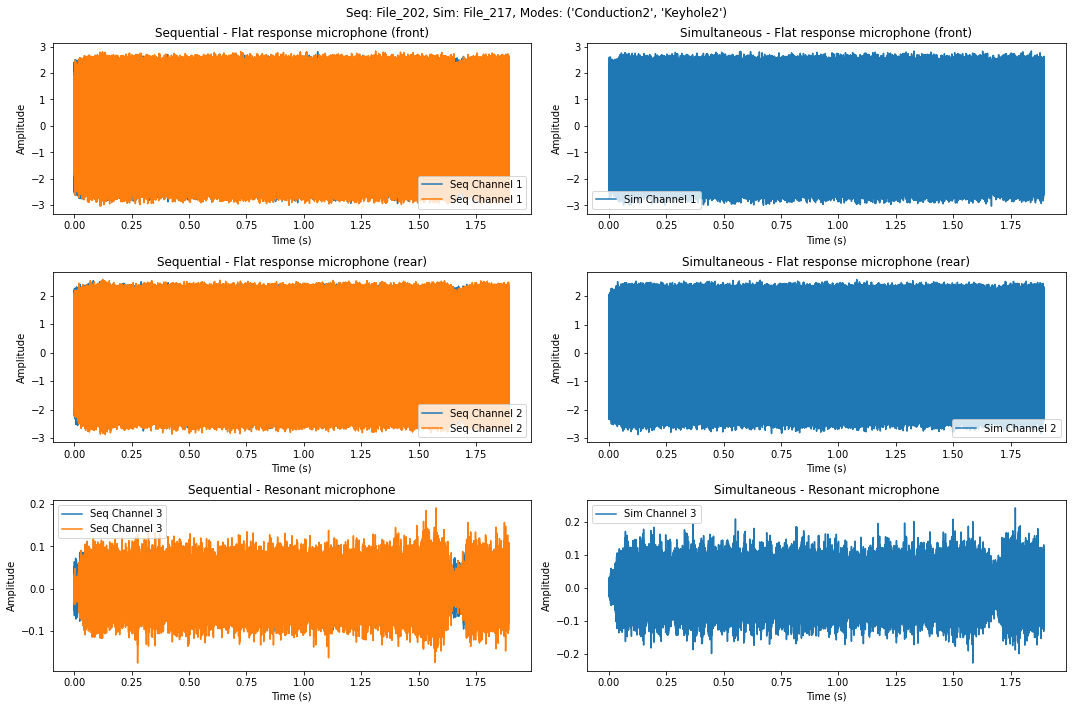

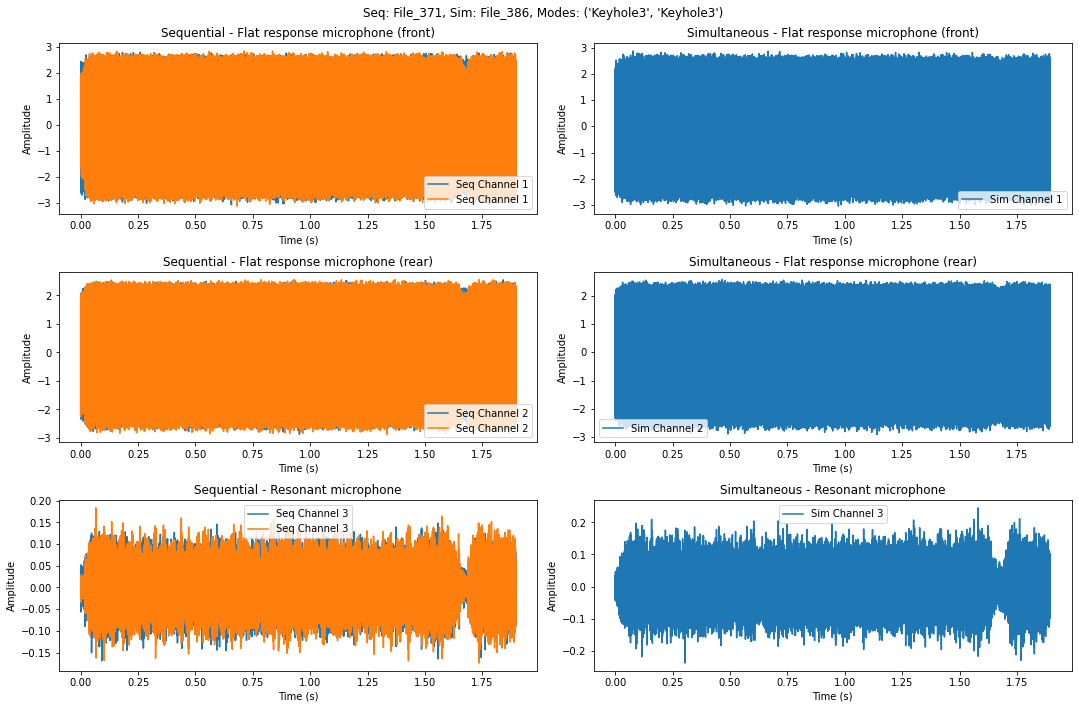

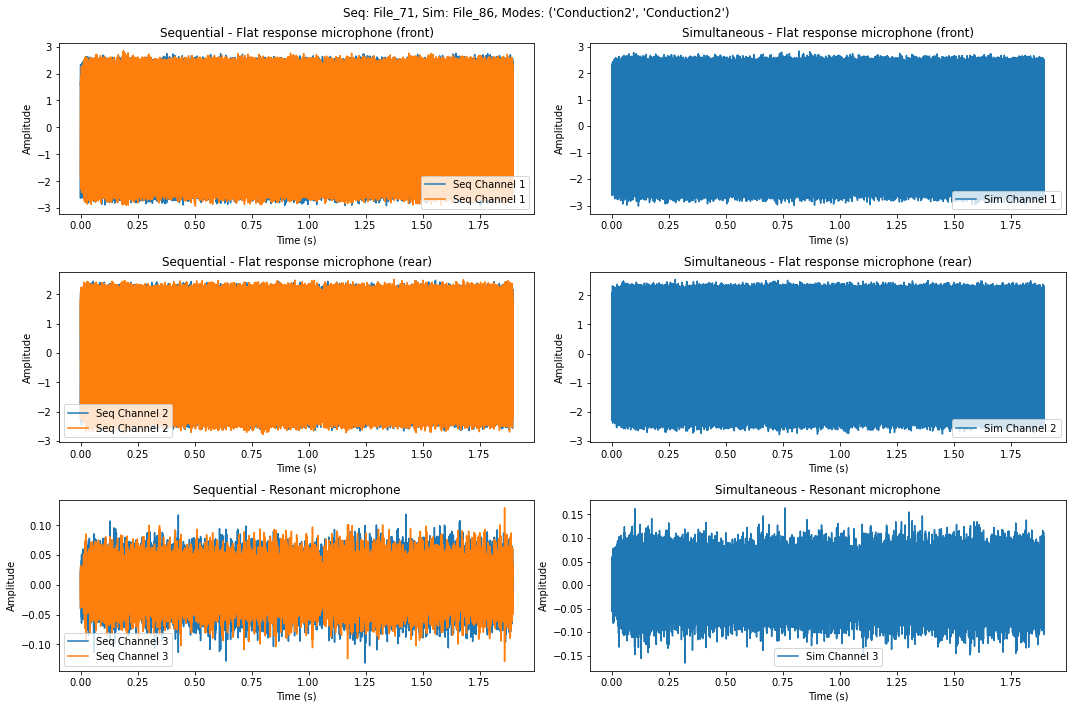

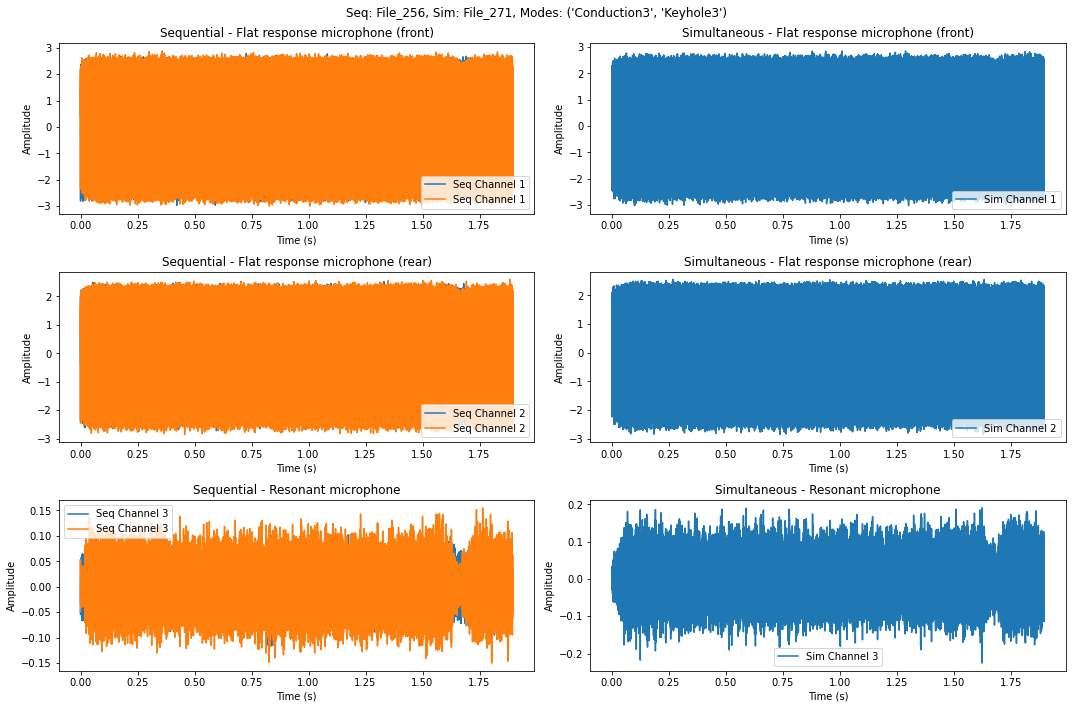

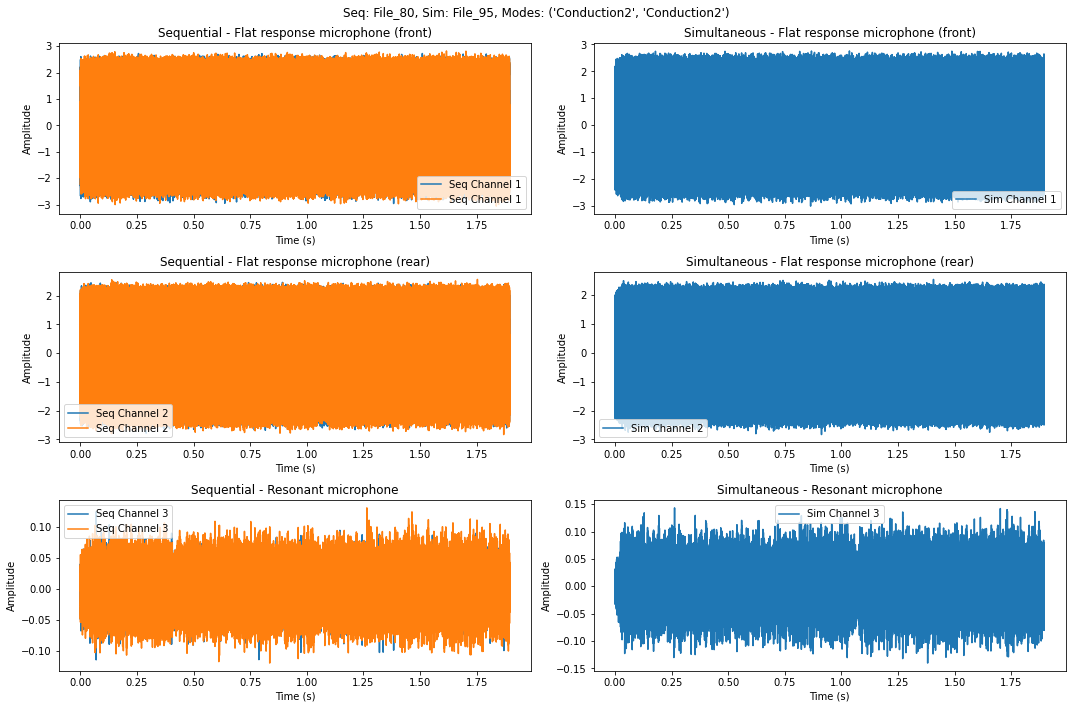

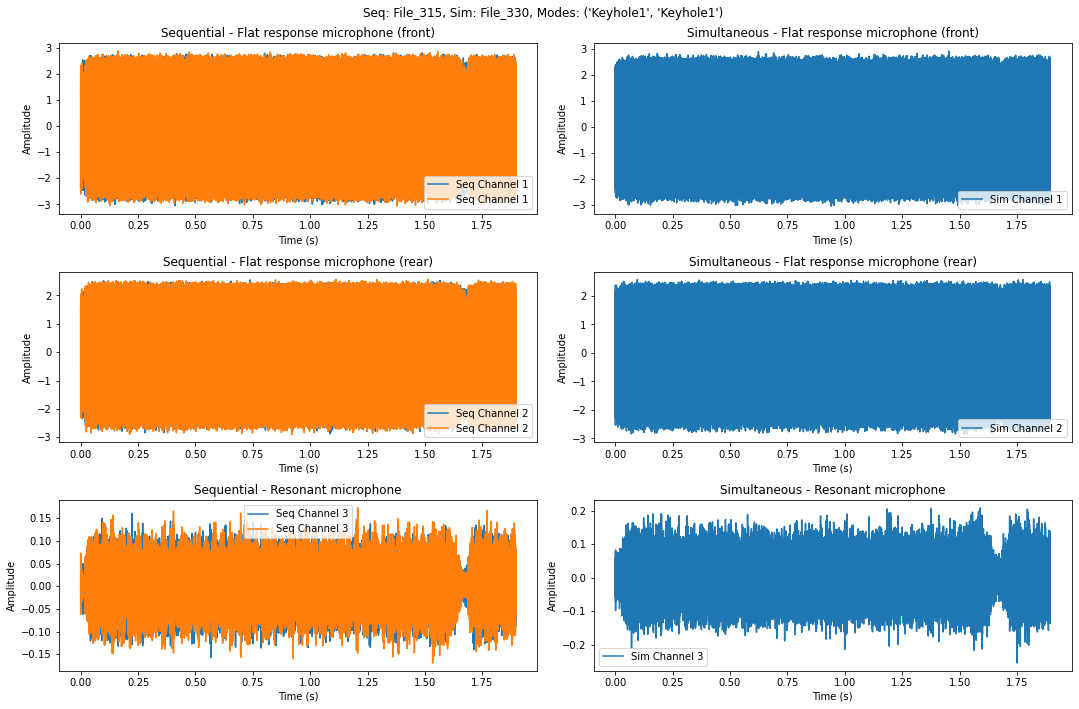

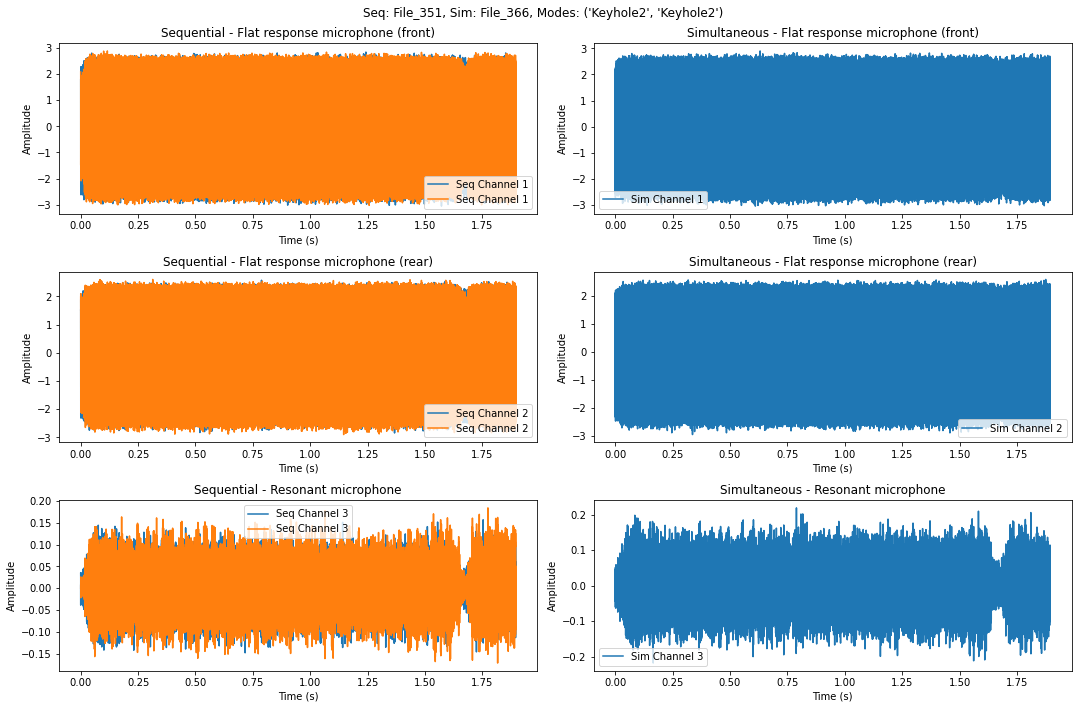

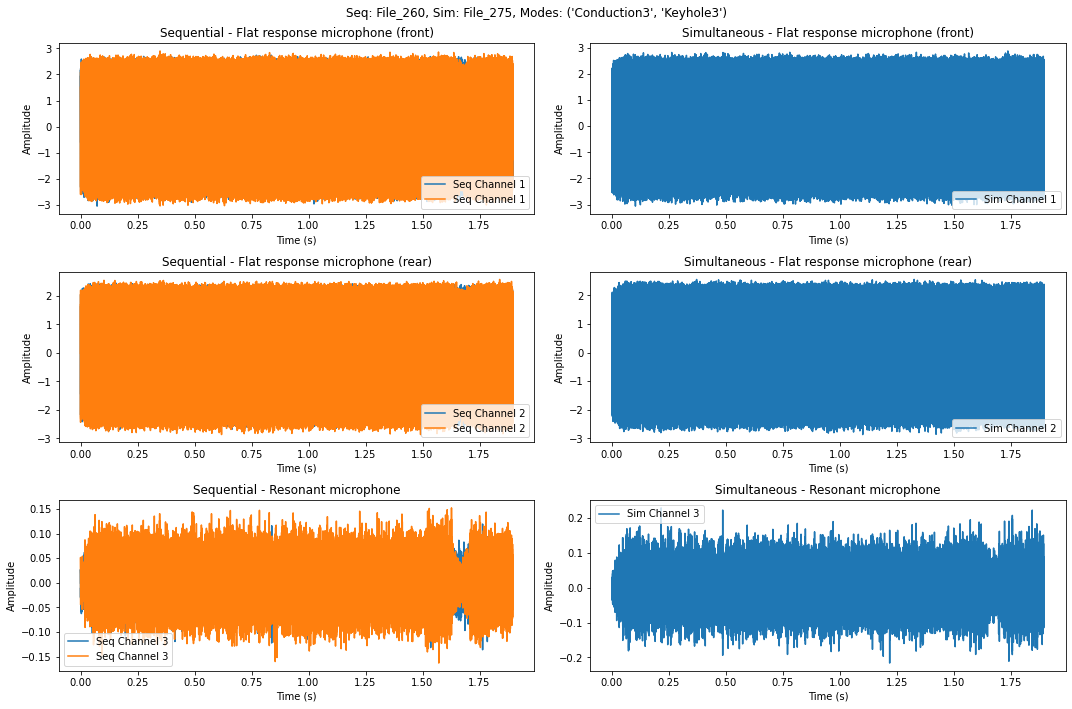

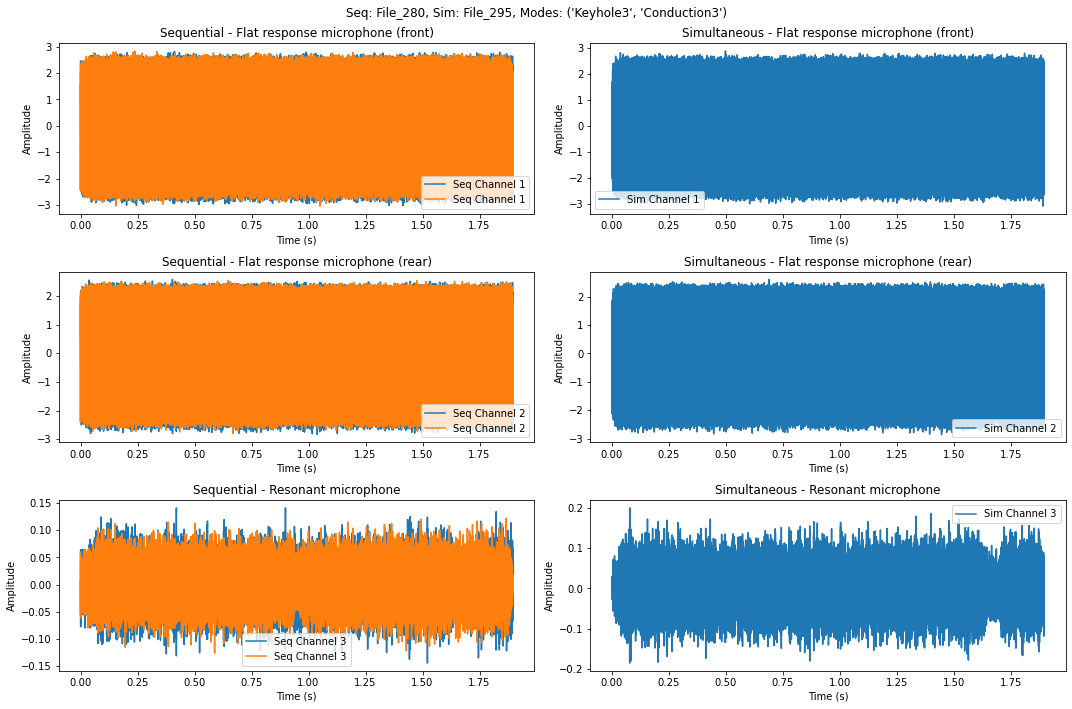

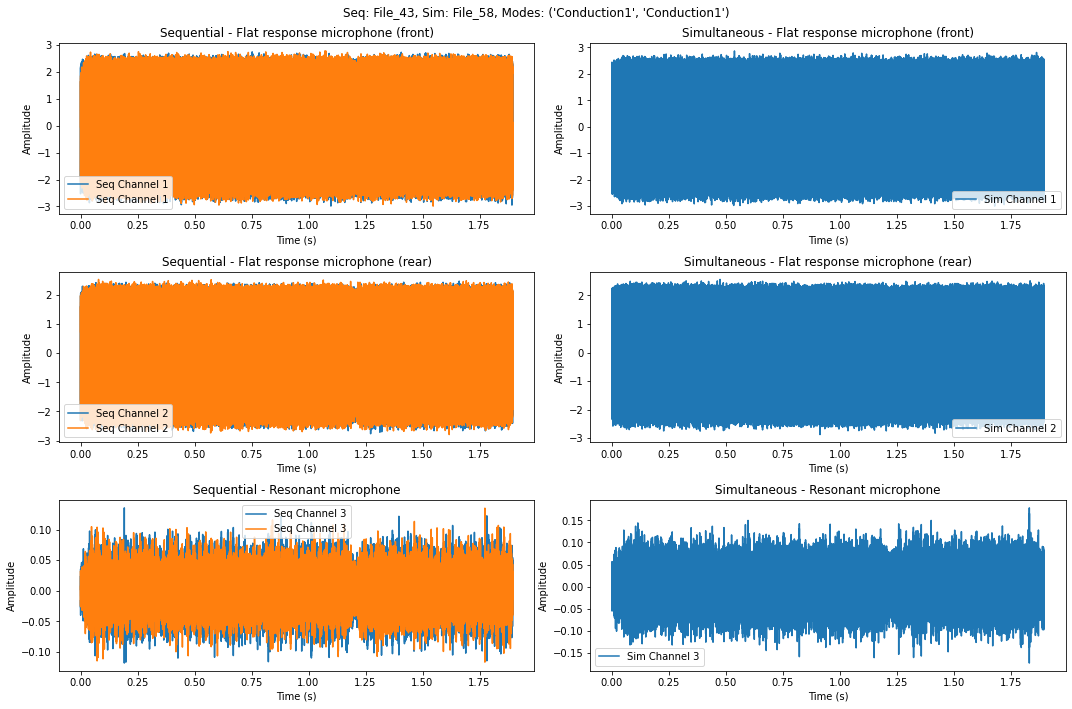

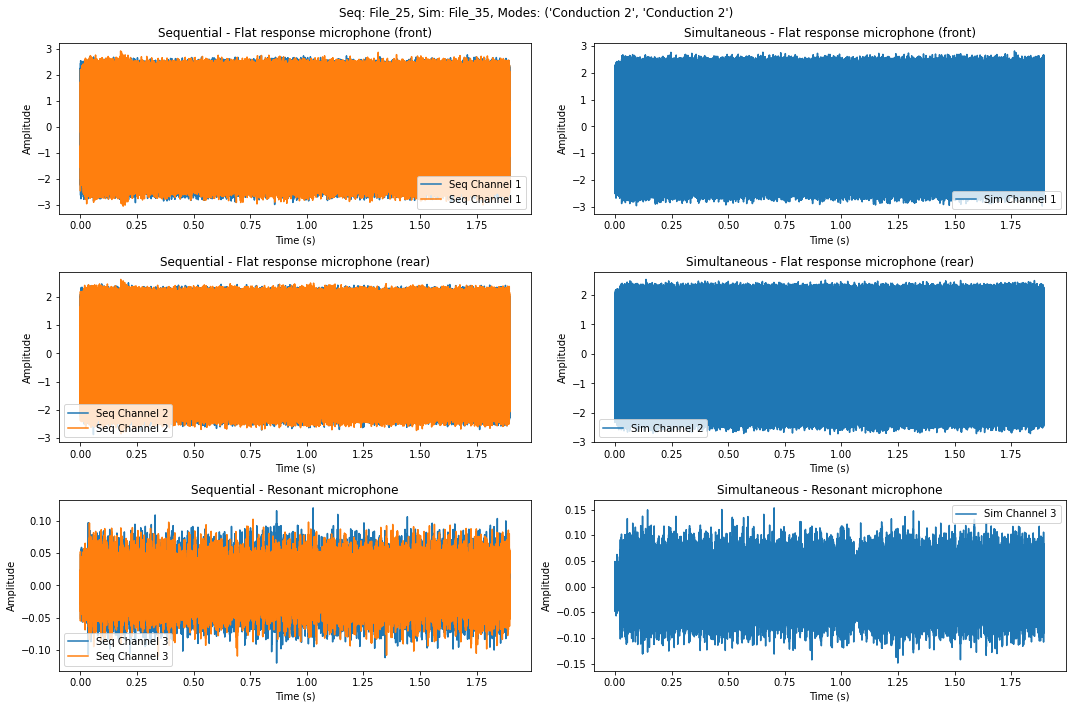

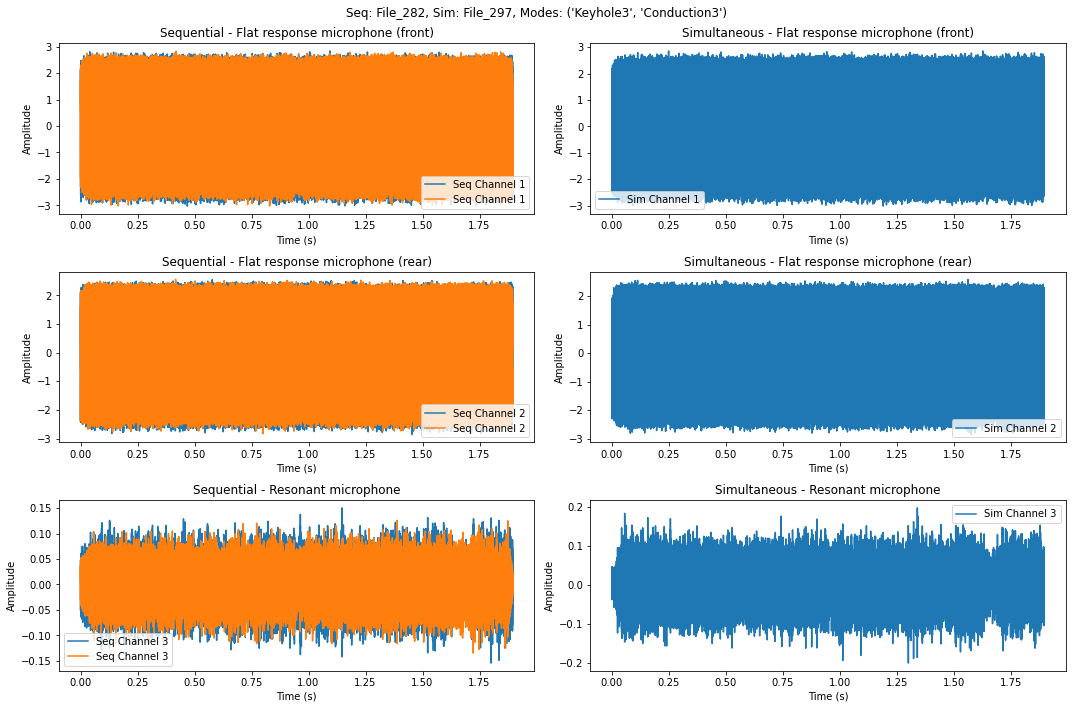

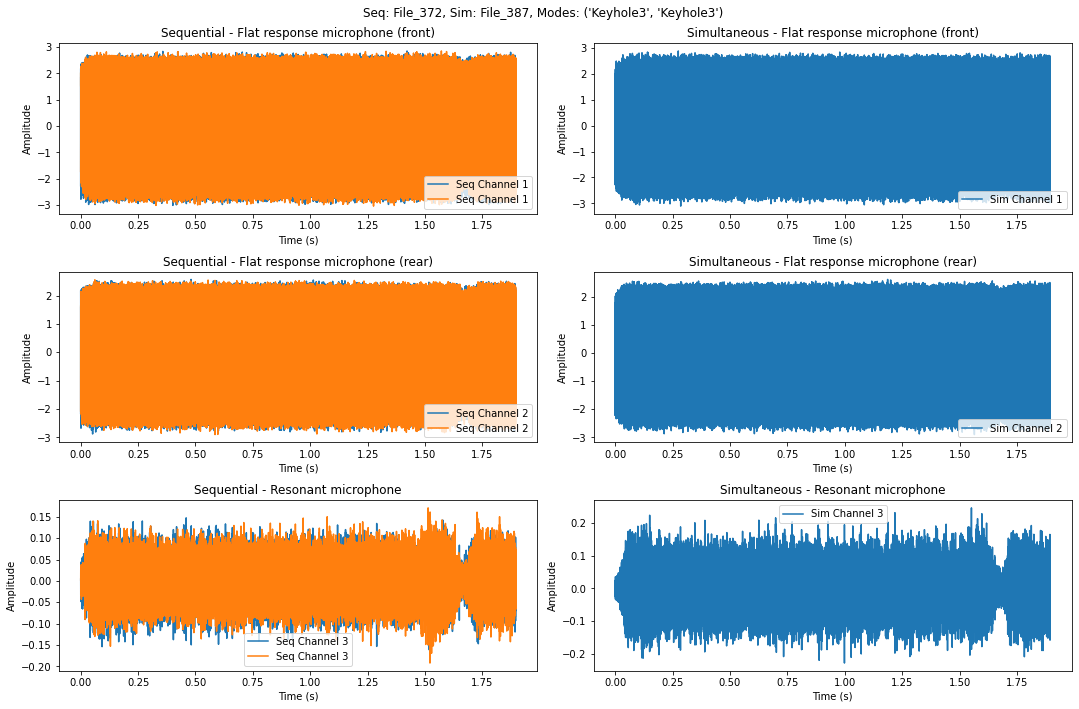

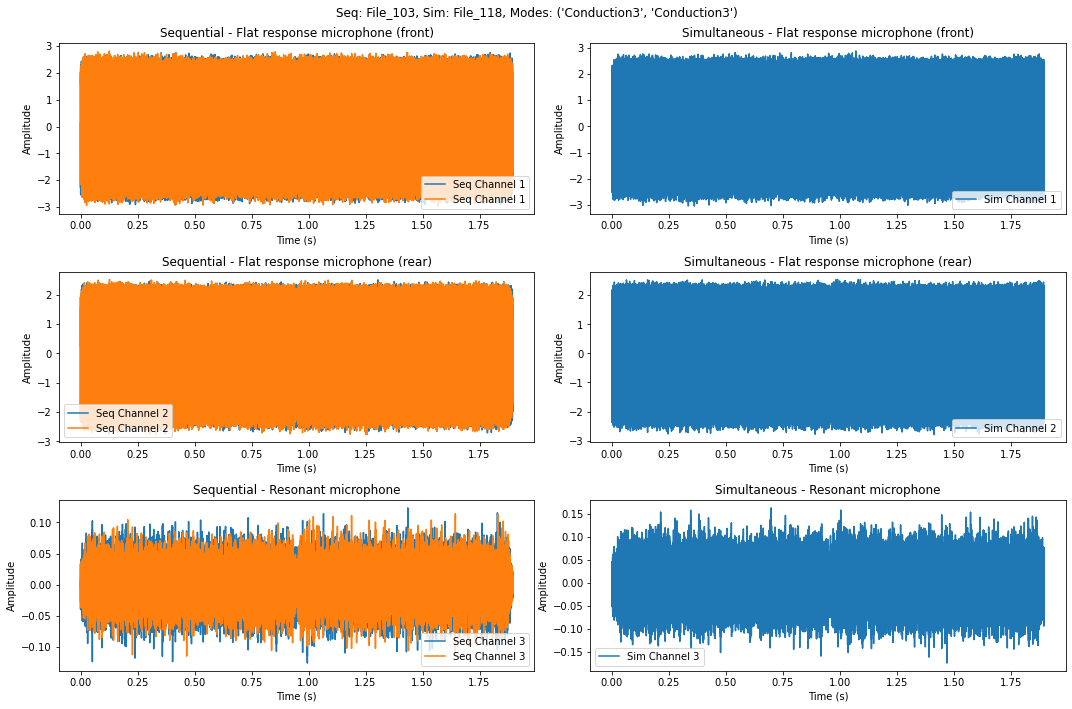

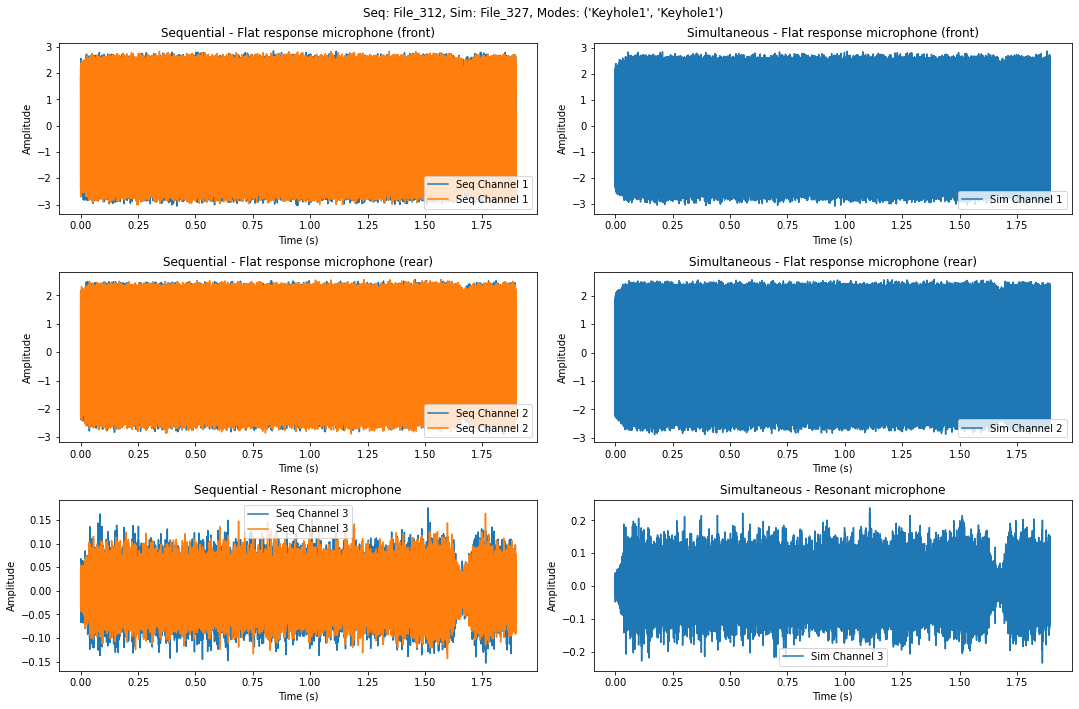

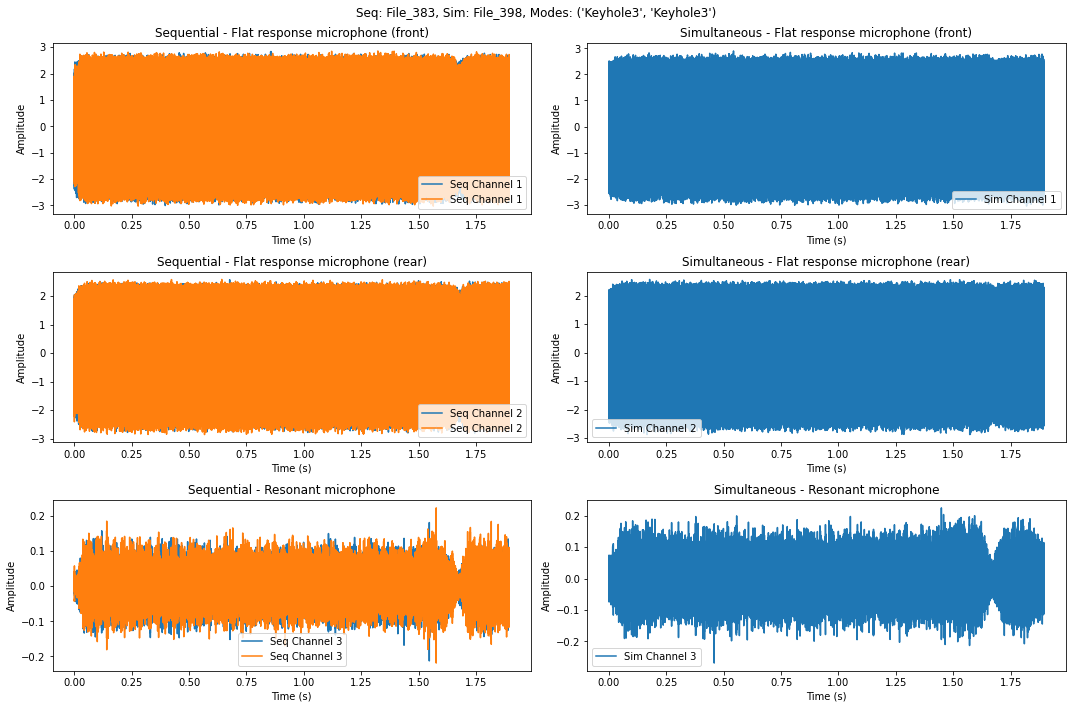

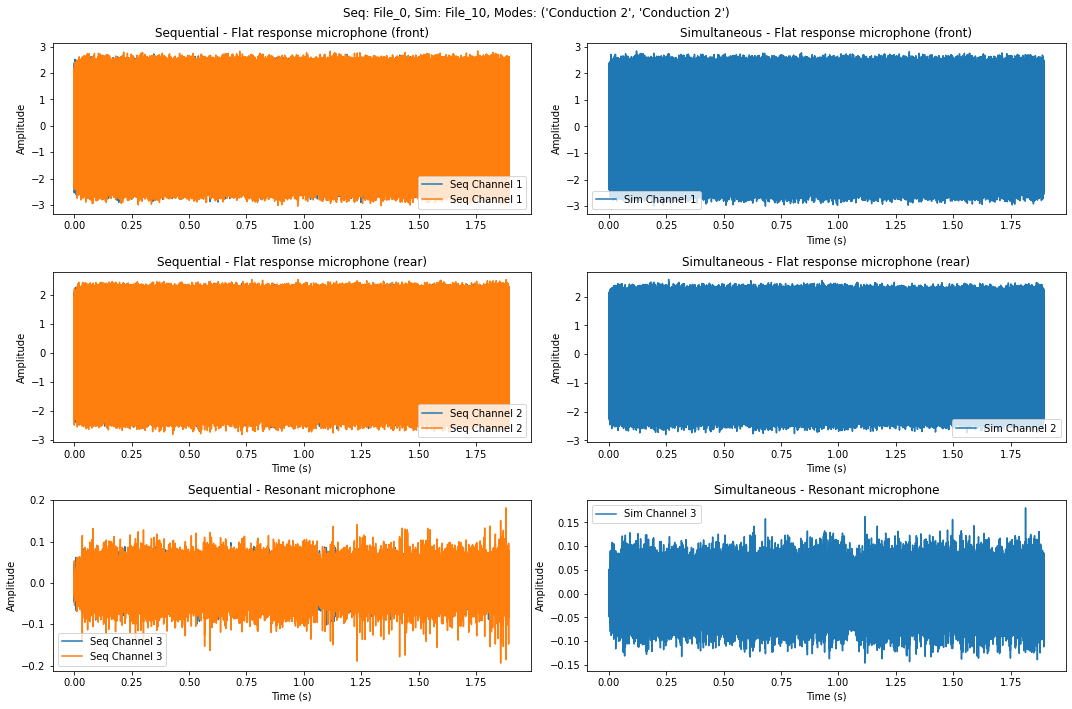

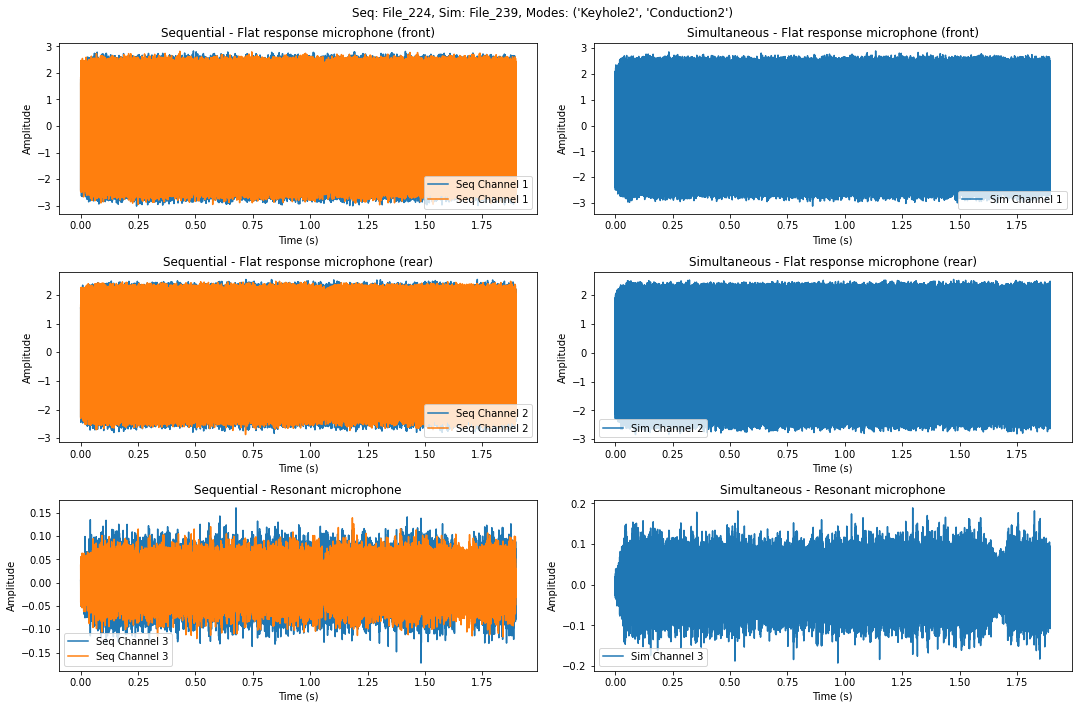

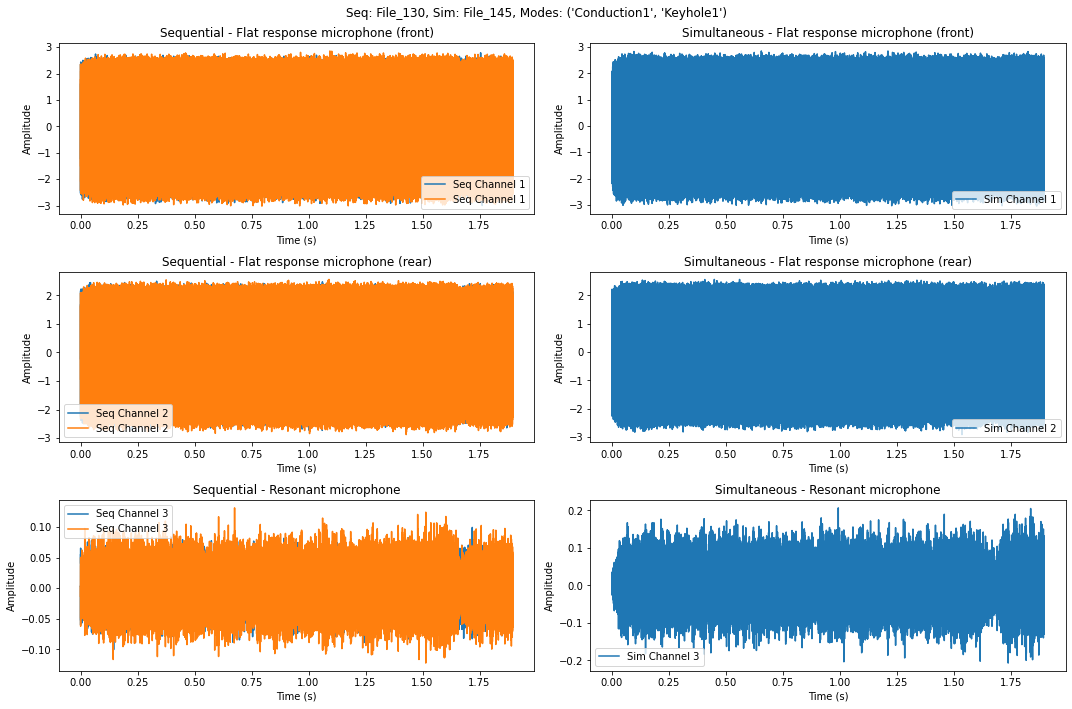

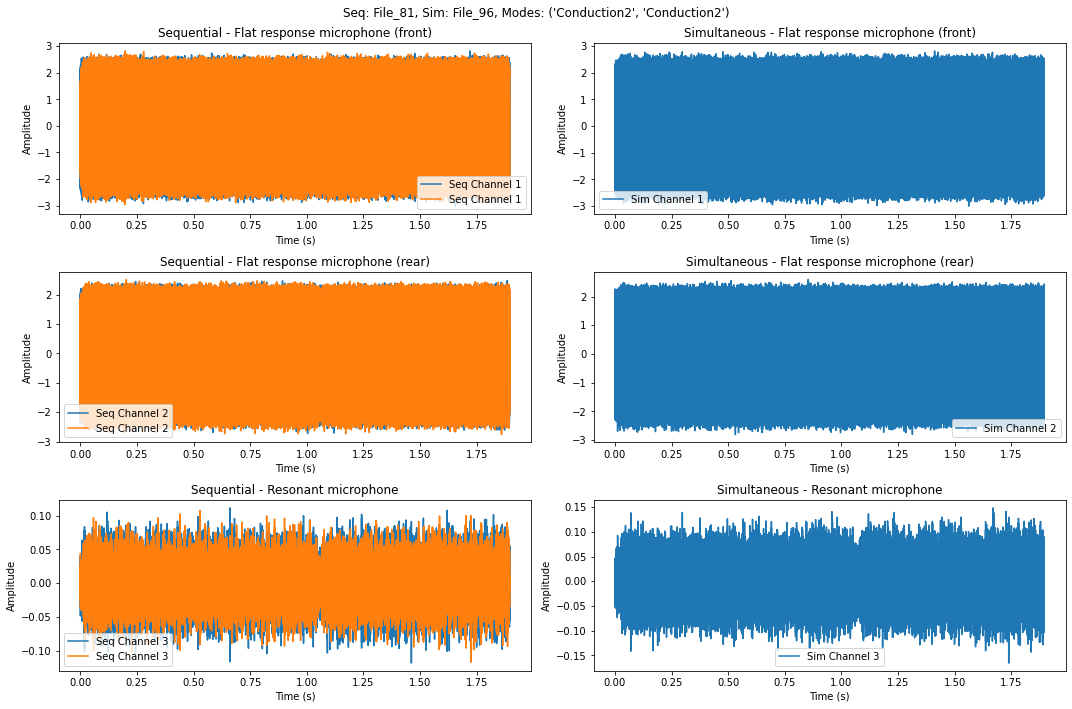

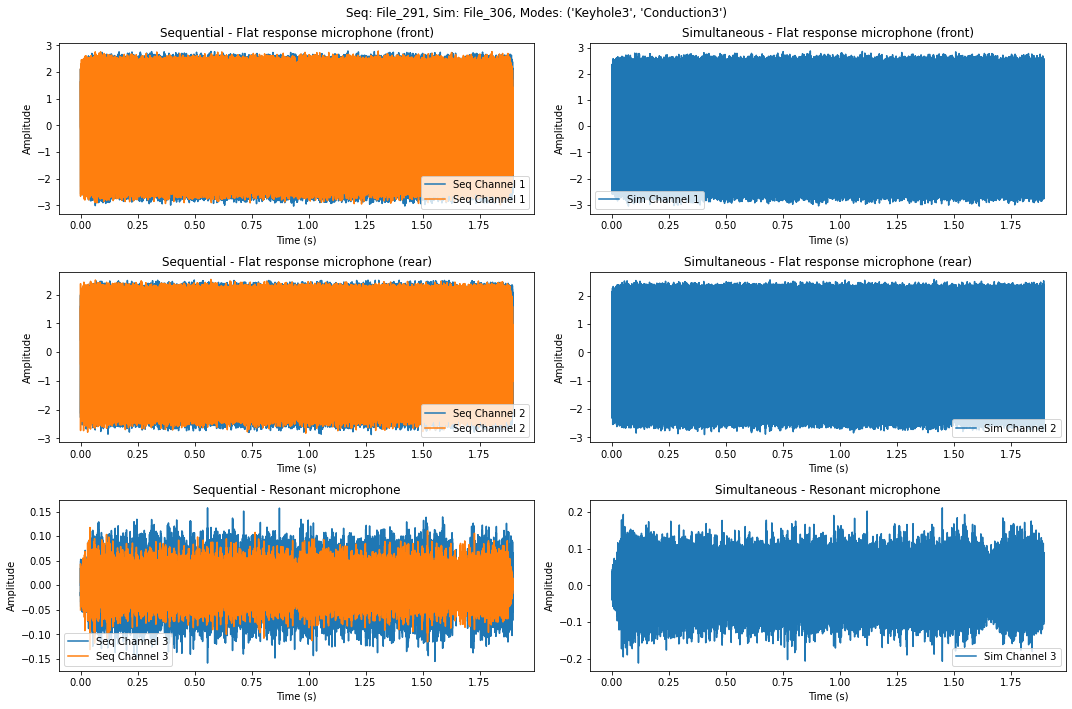

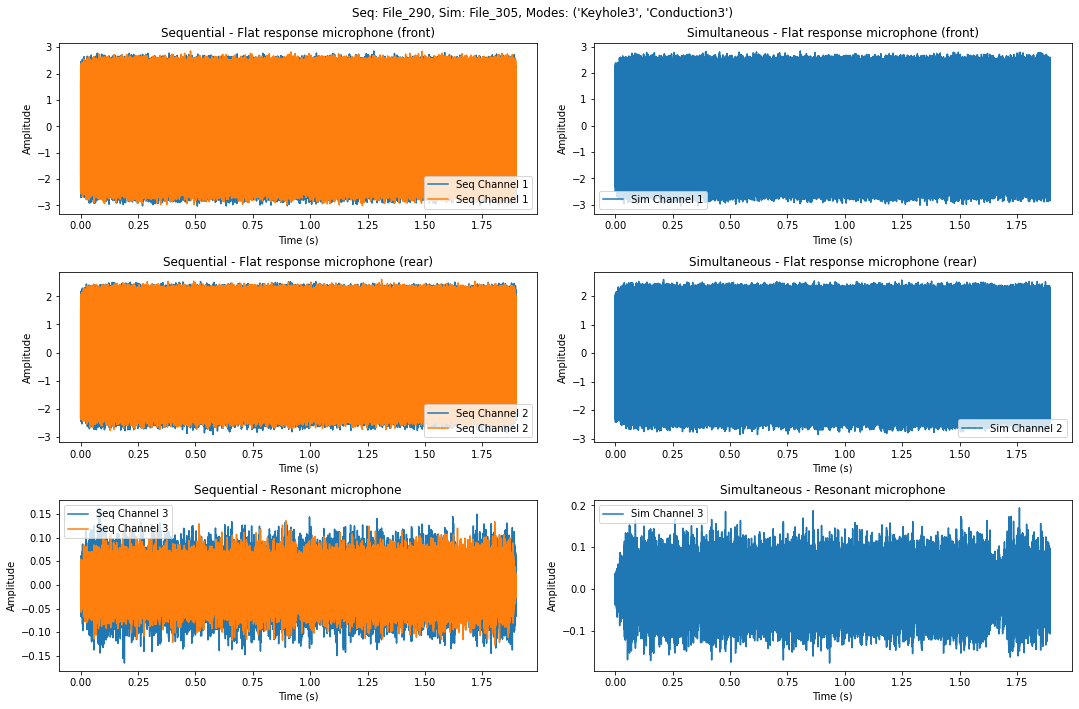

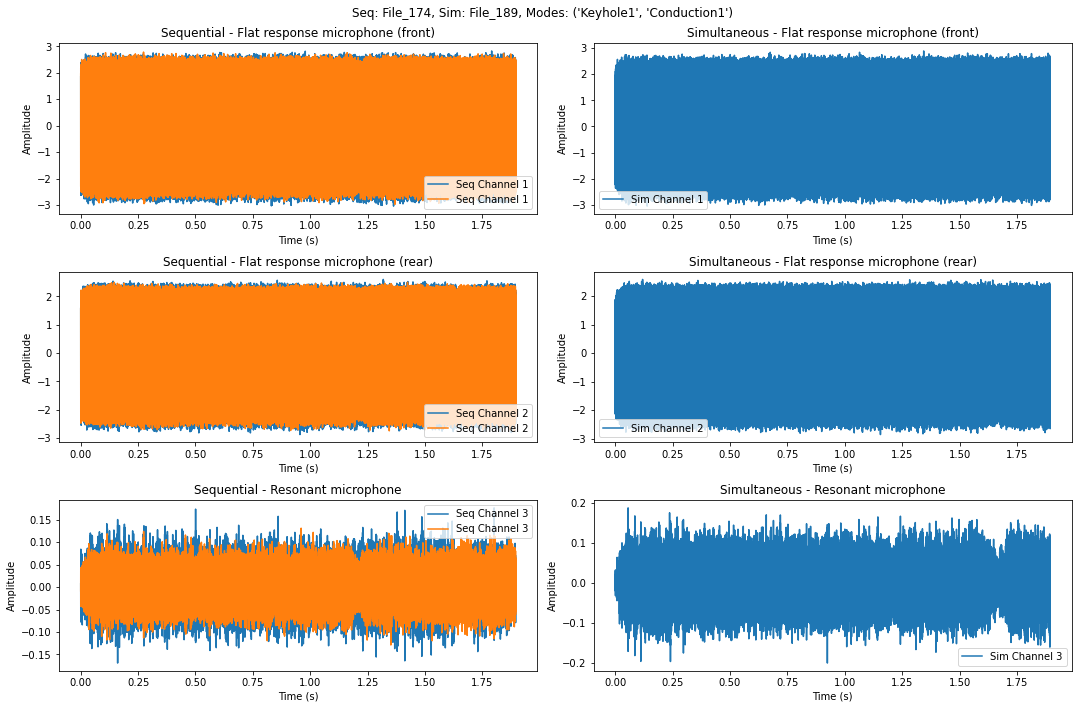

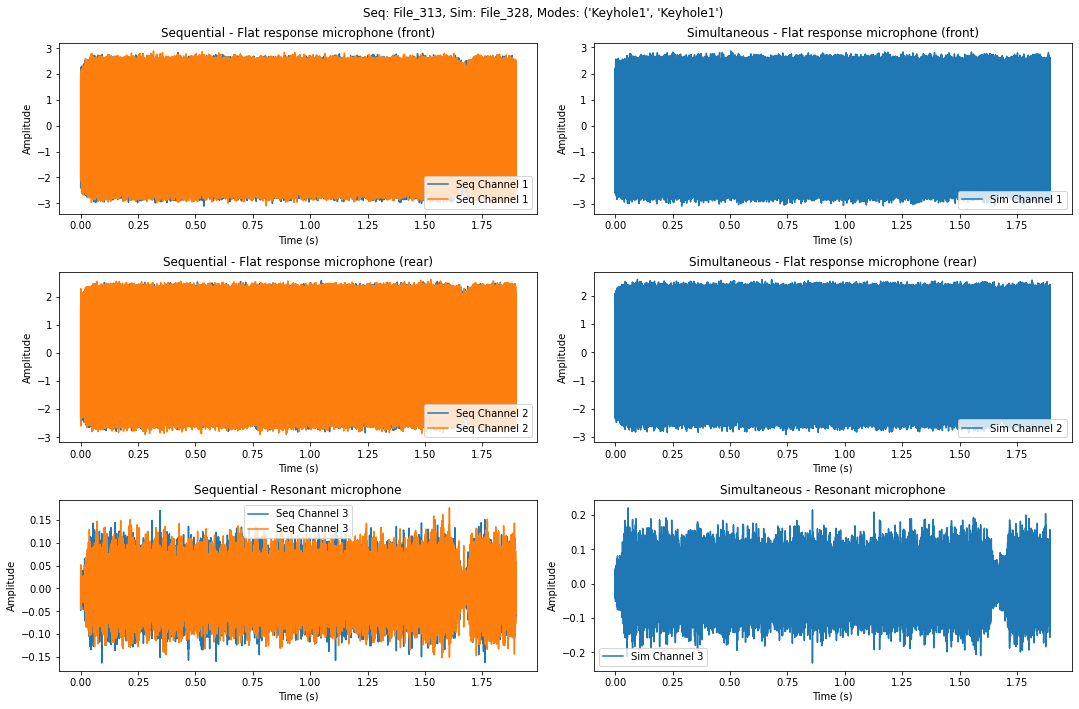

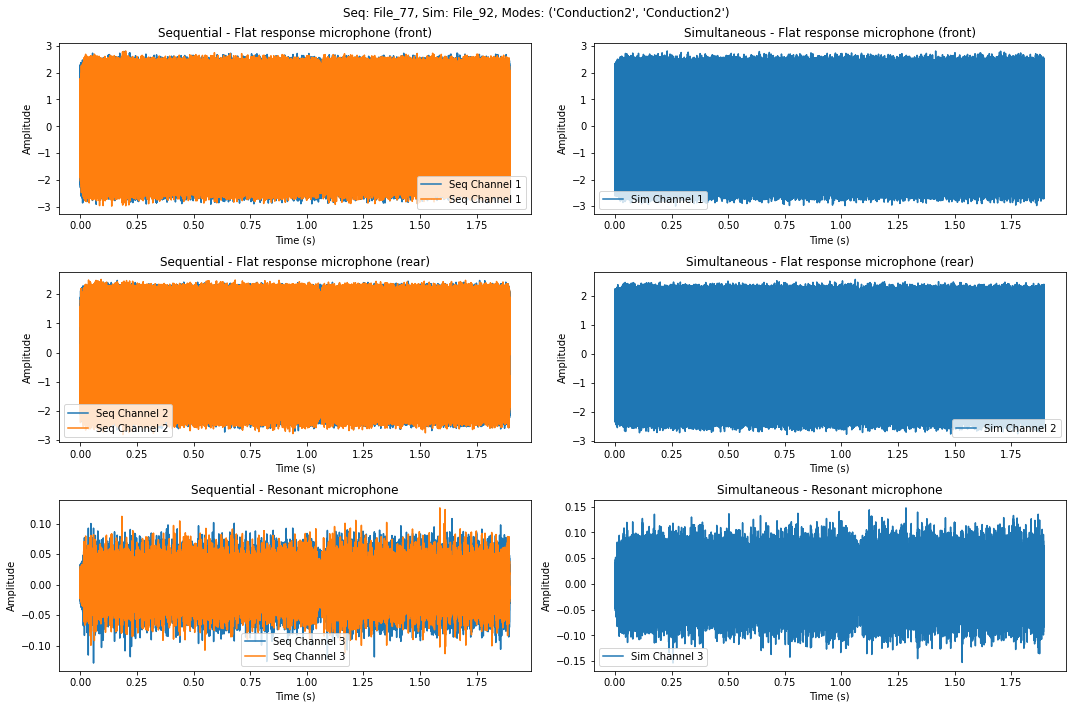

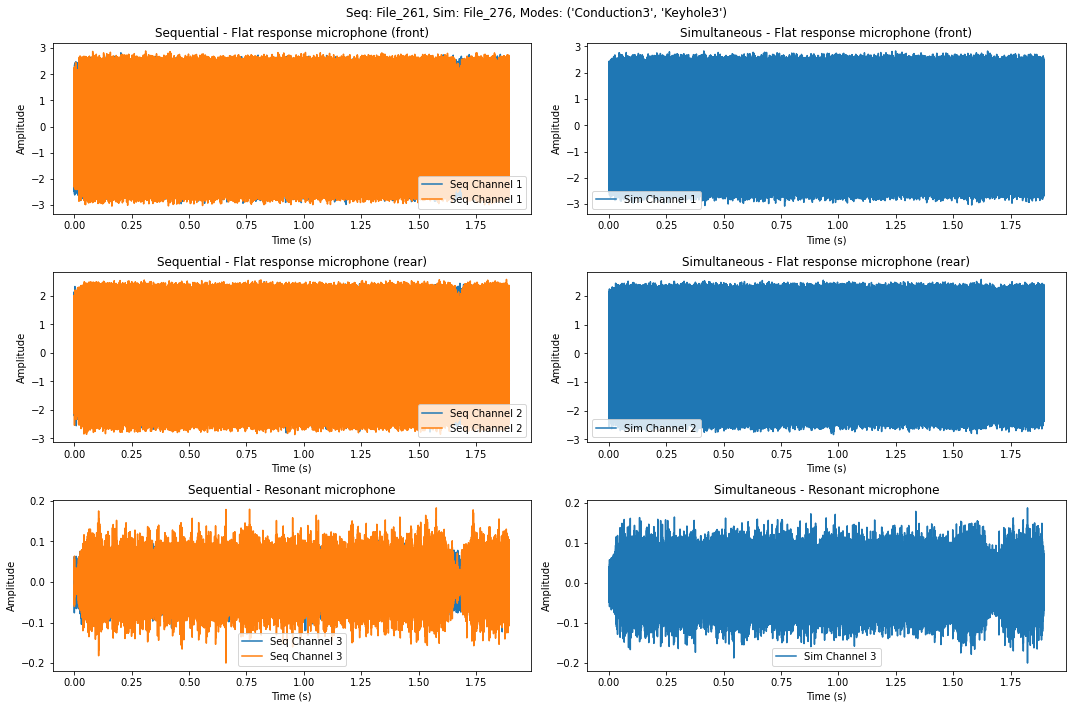

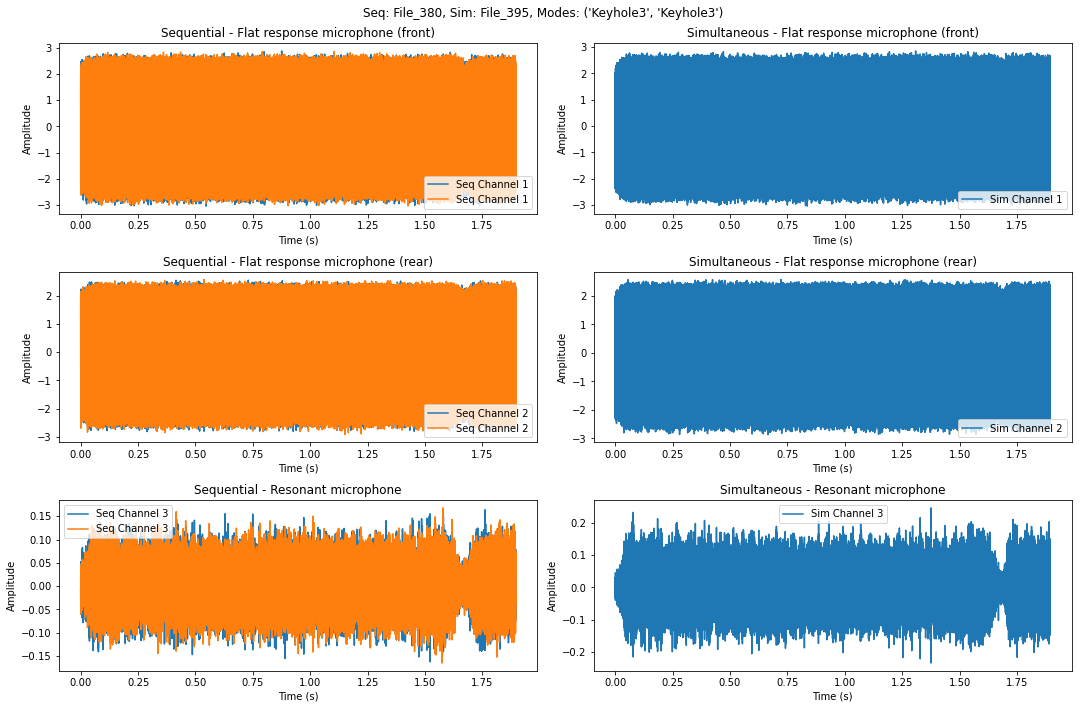

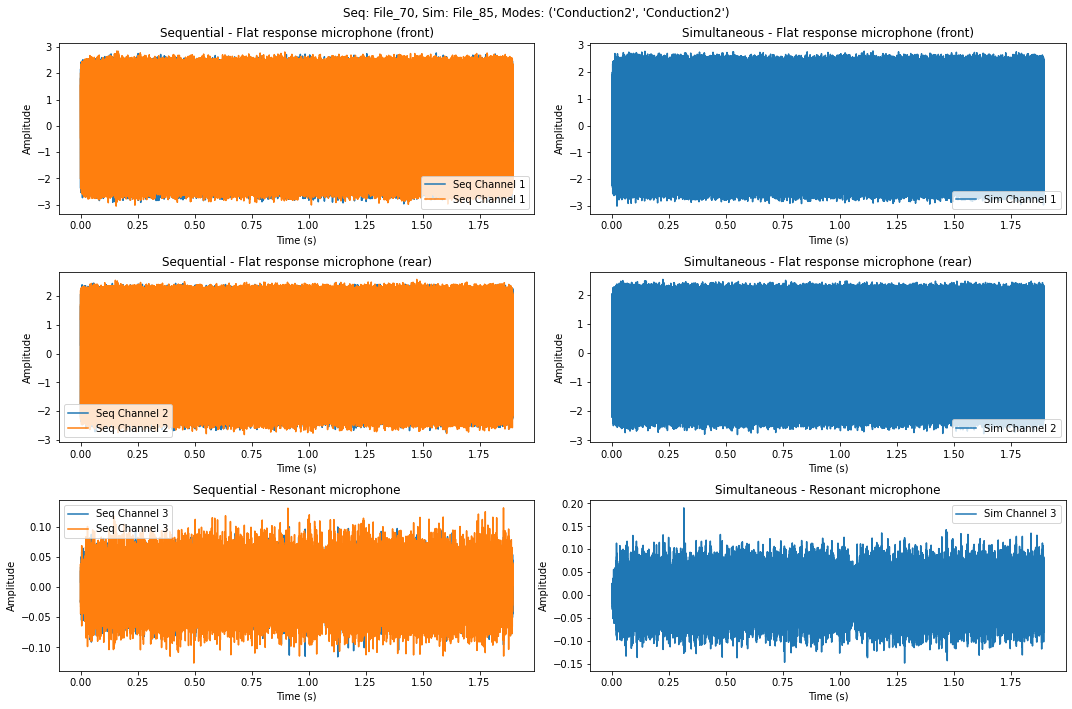

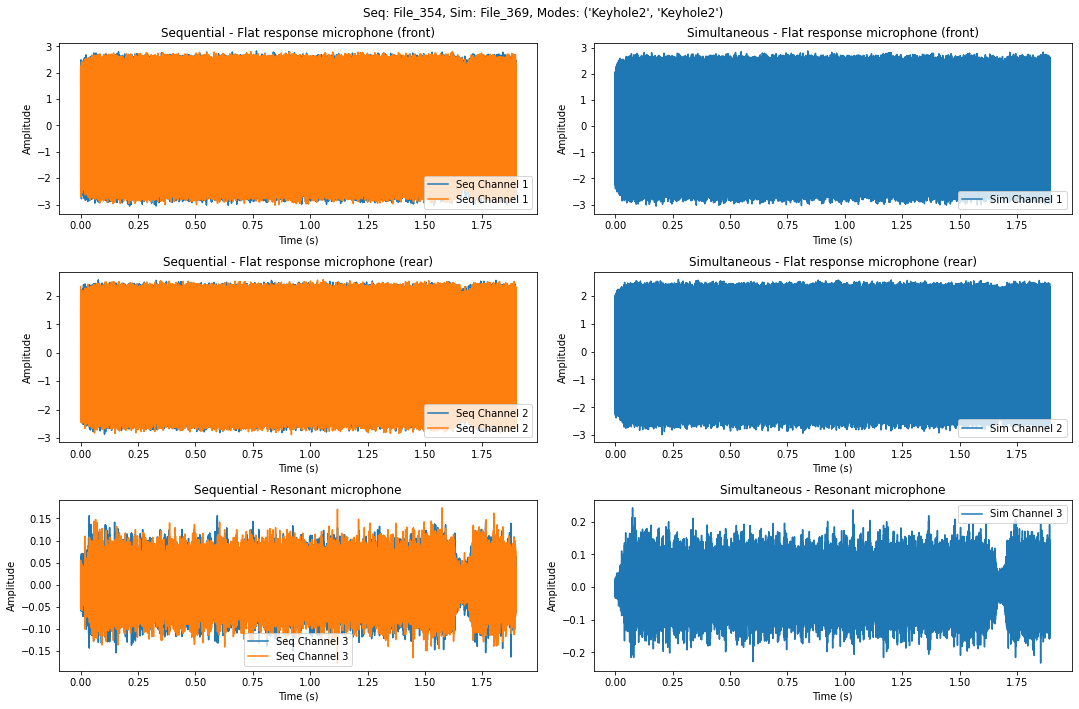

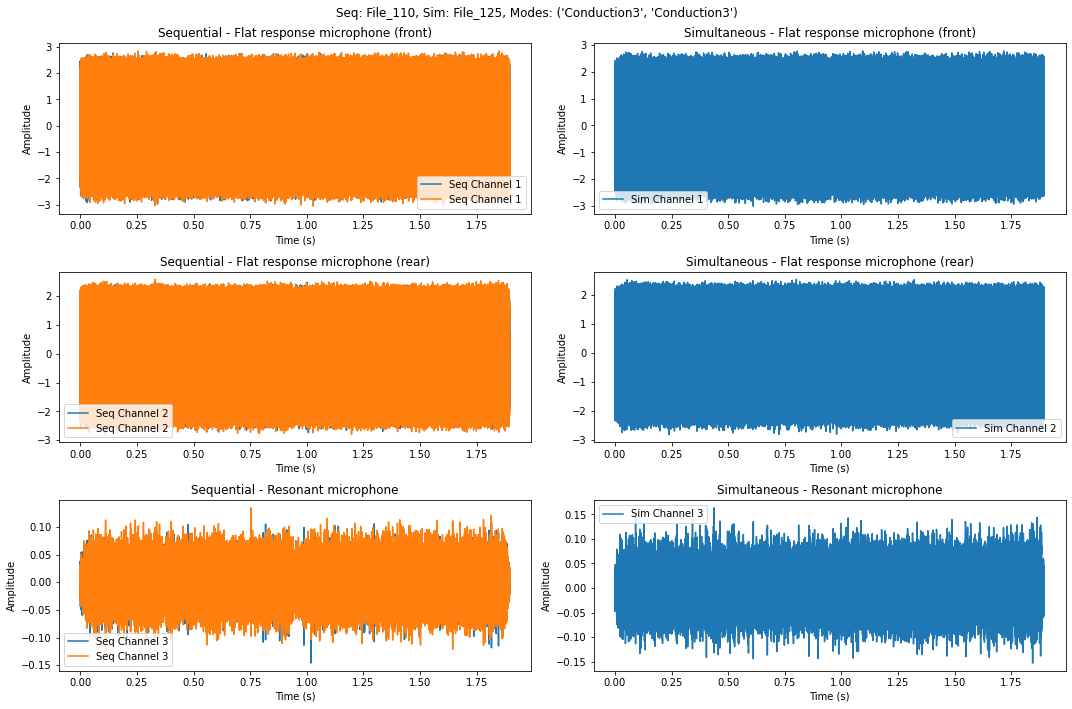

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import random

# Extract 30 random indexes from 0 to 200
random_indexes = random.sample(range(200), 30)

# Channel names based on the given descriptions
channel_names = {
    0: "Flat response microphone (front)",
    1: "Flat response microphone (rear)",
    2: "Resonant microphone"
}

# Sampling frequency for the time vector calculation
Fs = 200000  # 200kHz

# Iterate over the selected random indexes
for idx in random_indexes:
    seq_data = seq_tensor[idx]
    sim_data = sim_tensor[idx]
    file_name_seq, file_name_sim = file_names[idx]
    mode_desc = mode_descriptions[idx]

    # Number of samples in each signal
    N = seq_data.shape[-1]  # Using the last dimension as the number of samples
    time_vector = np.linspace(0, N / Fs, N, endpoint=False)  # Time vector for plotting
    
    # Plotting
    fig, axs = plt.subplots(3, 2, figsize=(15, 10))  # 3 channels, 2 columns for seq and sim
    fig.suptitle(f"Seq: {file_name_seq}, Sim: {file_name_sim}, Modes: {mode_desc}")
    
    for channel_idx in range(3):  
        # Plot sequential data
        axs[channel_idx, 0].plot(time_vector, seq_data[:, channel_idx, :].numpy().T, label=f"Seq Channel {channel_idx+1}")
        # Plot simultaneous data
        axs[channel_idx, 1].plot(time_vector, sim_data[channel_idx, :].numpy(), label=f"Sim Channel {channel_idx+1}")

        # Set titles and labels
        axs[channel_idx, 0].set_title(f"Sequential - {channel_names[channel_idx]}")
        axs[channel_idx, 1].set_title(f"Simultaneous - {channel_names[channel_idx]}")
        for j in range(2):
            axs[channel_idx, j].set_xlabel("Time (s)")
            axs[channel_idx, j].set_ylabel("Amplitude (V)")
            axs[channel_idx, j].legend()
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


In [42]:
# Packaging the data into a dictionary
data_package = {
    "seq_tensor": seq_tensor,
    "sim_tensor": sim_tensor,
    "file_names": file_names,
    "mode_descriptions": mode_descriptions,
}

import os
import pickle

data_folder = "./Data"
os.makedirs(data_folder, exist_ok=True)

with open(os.path.join(data_folder, "pytorch_database.pkl"), "wb") as f:
    pickle.dump(data_package, f)

